# 01 - Naive Bayesian - Binary - Solution

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Binary Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1) Generate a 2 class data using sklearn

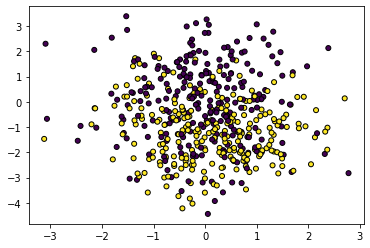

In [3]:
# generate quite a lot of noise
# with only 4 informative features out of 10
# with 2 redundant features, overlapping with that 4 informative features
# and 4 noisy features
# Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 2) Put Gaussian Naive Binary Classification into class

In [12]:
class NaiveGaussian_Binary():
    
    def fit(self, X_train, y_train): # fit the data with X_train and y_train
        
        # calculate the mean and std for each feature for each class
        n = X_train.shape[1]
        mean = np.zeros((2, n))
        std = np.zeros((2, n))
        for label in [0, 1]:
            mean[label, :] = X_train[y_train==label].mean(axis=0)
            std[label, :]  = X_train[y_train==label].std(axis=0)
        assert mean.shape == (2, X_train.shape[1])
        assert std.shape == (2, X_train.shape[1])
        self.mean = mean
        self.std = std
    
        # Calculate the prior p(y)
        m0 = len(X_train[y_train==0])
        m1 = len(X_train[y_train==1])
        self.prior0 = m0 / (m0 + m1)
        self.prior1 = m1 / (m0 + m1)
        assert self.prior0 + self.prior1 == 1, "sum of probability not equal to 1"
        
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def predict(self, X_test):
        likelihood0 = self.gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        likelihood1 = self.gaussian_pdf(X_test, self.mean[1, :], self.std[0, :])
        
        assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
        assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"
        
        # P(feature1|class0) * P(feature2|class0)
        total_likelihood0 = np.prod(likelihood0, axis=1)
        # P(feature1|class1) * P(feature2|class1)
        total_likelihood1 = np.prod(likelihood1, axis=1)
        
        # P(class0) * P(feature1|class0) * P(feature2|class0)
        posterior0 = self.prior0 * total_likelihood0    
        # P(class1) * P(feature1|class1) * P(feature2|class1)
        posterior1 = self.prior1 * total_likelihood1
        
        yhat = 1 * posterior1 > posterior0
        
        return yhat

In [13]:
NGB = NaiveGaussian_Binary()

NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)

### 3) Calculate accuracy accordingly.

In [14]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7729411764705882
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.79      0.87      0.83        75
           1       0.85      0.77      0.81        75

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

